In [109]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [110]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [111]:
NUM_CLASSES = 11

# Dataset reading

In [112]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [113]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [115]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [116]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 16)                688       
                                                                 
 dropout_15 (Dropout)        (None, 16)                0         
                                                                 
 dense_26 (Dense)            (None, 32)                544       
                                                                 
 dropout_16 (Dropout)        (None, 32)                0         
                                                                 
 dense_27 (Dense)            (None, 64)                2112      
                                                                 
 dropout_17 (Dropout)        (None, 64)                0         
                                                                 
 dense_28 (Dense)            (None, 11)               

In [117]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [118]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [119]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


1/1 [==============================] - ETA: 0s - loss: 2.4133 - accuracy: 0.1059
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 2s 2s/step - loss: 2.4133 - accuracy: 0.1059 - val_loss: 2.3797 - val_accuracy: 0.1034
Epoch 2/1000
1/1 [==============================] - ETA: 0s - loss: 2.3934 - accuracy: 0.1176
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5


C:\Users\Cristina\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 158ms/step - loss: 2.3934 - accuracy: 0.1176 - val_loss: 2.3749 - val_accuracy: 0.1379
Epoch 3/1000
1/1 [==============================] - ETA: 0s - loss: 2.3831 - accuracy: 0.1412
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 168ms/step - loss: 2.3831 - accuracy: 0.1412 - val_loss: 2.3702 - val_accuracy: 0.1379
Epoch 4/1000
1/1 [==============================] - ETA: 0s - loss: 2.3794 - accuracy: 0.1765
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 171ms/step - loss: 2.3794 - accuracy: 0.1765 - val_loss: 2.3654 - val_accuracy: 0.1379
Epoch 5/1000
1/1 [==============================] - ETA: 0s - loss: 2.3829 - accuracy: 0.1765
Epoch 5: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 146ms/step - loss: 2.3829 - accuracy: 0.1765 - val_loss: 2.36

In [120]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

1/1 [==============================] - 0s 45ms/step - loss: 0.3621 - accuracy: 0.8966


In [121]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [122]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 105ms/step
[9.78561093e-06 3.63875233e-06 1.89355880e-04 4.01426078e-04
 1.06149500e-05 2.33154733e-05 1.02096266e-04 2.06005089e-02
 9.58043516e-01 8.25272501e-03 1.23630194e-02]
8


# Confusion matrix

1/1 [==============================] - 0s 99ms/step


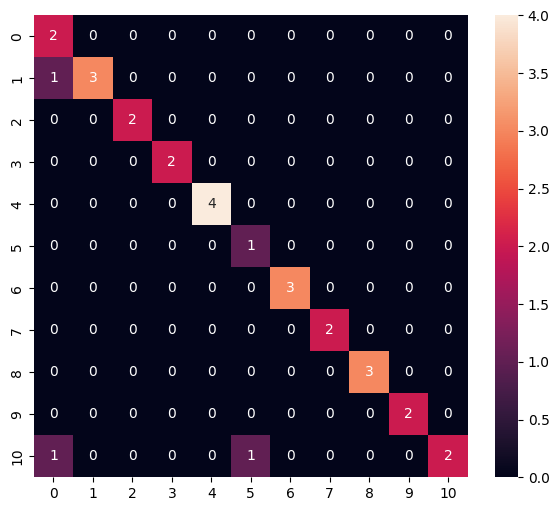

Classification Report
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.75      0.86         4
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         4
           5       0.50      1.00      0.67         1
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         2
          10       1.00      0.50      0.67         4

    accuracy                           0.90        29
   macro avg       0.91      0.93      0.90        29
weighted avg       0.95      0.90      0.90        29



In [123]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [124]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

C:\Users\Cristina\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [125]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Cristina\AppData\Local\Temp\tmpwsk0z8lv\assets


INFO:tensorflow:Assets written to: C:\Users\Cristina\AppData\Local\Temp\tmpwsk0z8lv\assets


12760

# Inference test

In [126]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [127]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [128]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [129]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 2.13 ms


In [130]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.5812366e-06 3.5746782e-06 1.8790975e-04 3.9924137e-04 1.0456444e-05
 2.3174796e-05 9.9955469e-05 2.0476583e-02 9.5833802e-01 8.2242815e-03
 1.2227200e-02]
8
